# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

La agrupación en clústeres es una técnica de aprendizaje automático *no supervisada* en la que se entrena un modelo para agrupar entidades similares en clústeres en función de sus características.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

En este ejercicio, debe separar un conjunto de datos que consta de tres características numéricas (**A**, **B** y **C**) en clústeres. Ejecute la siguiente celda para cargar los datos.

In [11]:
import pandas as pd

data = pd.read_csv('../challenges/data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Su desafío es identificar la cantidad de clústeres discretos presentes en los datos y crear un modelo de agrupación que separe los datos en esa cantidad de clústeres. También debe visualizar los grupos para evaluar el nivel de separación logrado por su modelo.

Add markdown and code cells as required to create your solution.

Agregue celdas de descuento y código según sea necesario para crear su solución.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).
> **Nota**: No existe una única solución "correcta". Se proporciona una solución de muestra en [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

In [12]:
# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:3]]
features.sample(10)

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

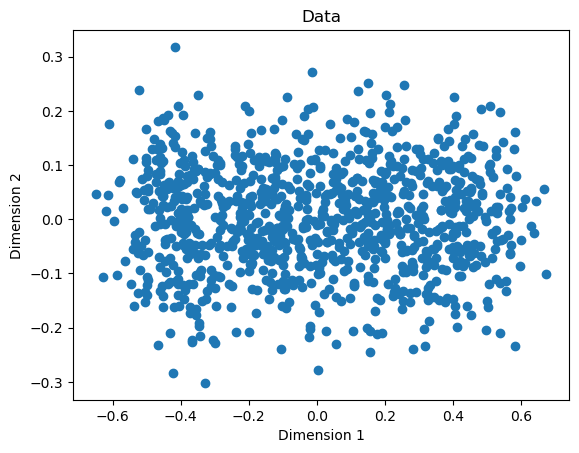

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

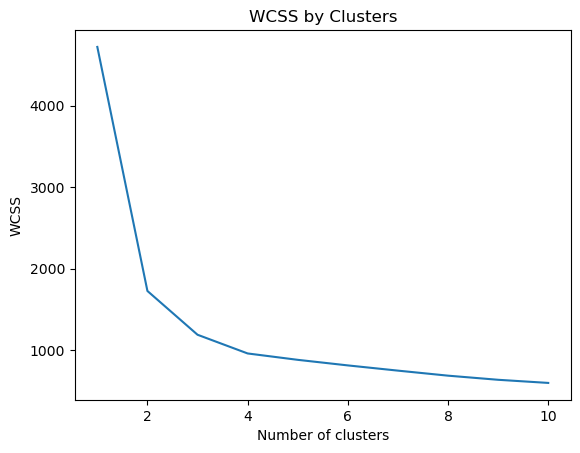

In [15]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
max_range = 11 #se prueba con 11,21,31,41, 101 ...misma tendencia
for i in range(1, max_range):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, max_range), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=500, max_iter=1500)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 2, 0, 0, 3, 3, 3, 2, 0, 3, 3, 1, 3,
       1, 1, 3, 0, 2, 1, 0, 3, 0, 1, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 2, 0,
       2, 1, 1, 2, 2, 3, 1, 0, 2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3,
       0, 3, 0, 2, 0, 3, 3, 2, 0, 3, 3, 3, 1, 0, 3, 0, 2, 0, 3, 2, 0, 3,
       3, 0, 0, 0, 2, 3, 0, 3, 2, 3, 2, 0, 3, 0, 2, 0, 3, 0, 2, 3, 3, 2,
       3, 0, 1, 1, 0, 2, 0, 2, 1, 0, 3, 0, 2, 2, 1, 3, 0, 3, 2, 1, 0, 0,
       0, 3, 0, 0, 3, 1, 3, 0, 1, 0, 0, 1, 2, 2, 3, 2, 3, 3, 2, 1, 1, 3,
       1, 0, 1, 3, 3, 3, 0, 1, 2, 2, 3, 0, 0, 1, 1, 2, 1, 0, 3, 2, 3, 0,
       0, 3, 3, 1, 3, 1, 0, 0, 3, 2, 1, 2, 2, 0, 0, 1, 0, 3, 2, 0, 3, 3,
       1, 2, 0, 2, 2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 0, 1, 2, 3, 3, 2, 1, 2,
       3, 1, 0, 2, 0, 3, 0, 1, 0, 1, 3, 1, 0, 3, 1, 2, 2, 1, 2, 0, 2, 0,
       2, 3, 3, 0, 2, 1, 1, 3, 2, 3, 0, 0, 2, 2, 2, 1, 2, 1, 3, 2, 2, 3,
       1, 3, 0, 0, 0, 3, 2, 1, 3, 0, 1, 0, 2, 3, 3, 1, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 3, 3, 0, 1, 2,

Veamos esas asignaciones de grupos con los puntos de datos bidimensionales.

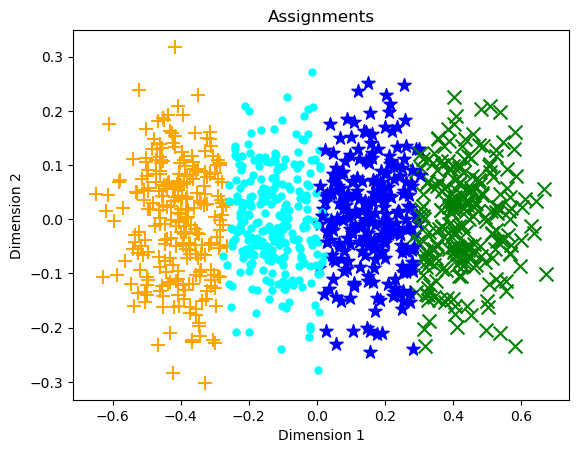

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+',3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

### Probando el aprupamiento aglomerativo

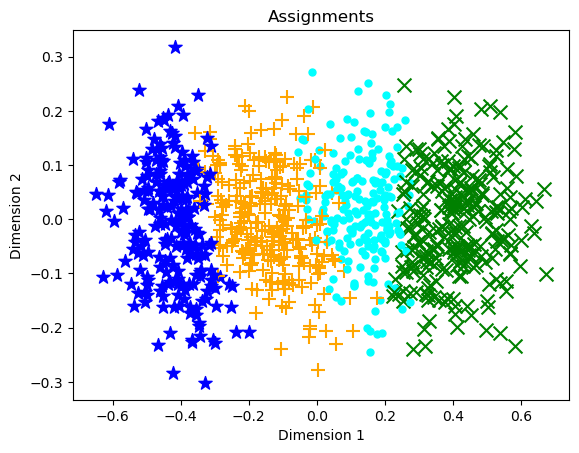

In [22]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(data)
plot_clusters(features_2d, agg_clusters)